In [1]:
import pandas as pd
import numpy as np
import os
import io
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
os.getcwd()

train = pd.read_csv('train.csv')
train.head()

test = pd.read_csv('test.csv')
test.head()

data = pd.concat([train, test])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data visualization

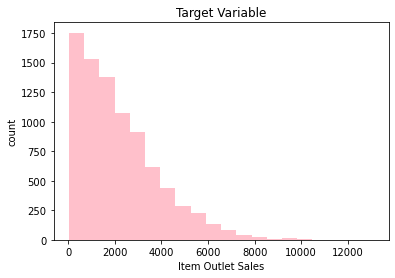

In [10]:
plt.hist(train['Item_Outlet_Sales'], bins = 20, color = 'pink')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

In [15]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [16]:
# checking the different items in Item Idemtifier
data['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

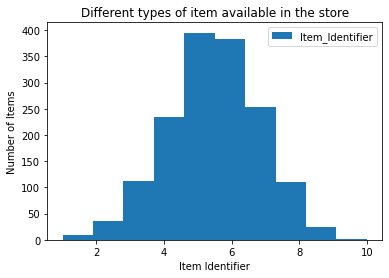

In [17]:
train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [18]:
# checking the different items in Item Fat Content

train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

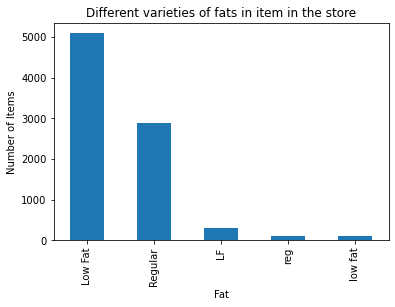

In [19]:
# checking different varieties of item fat content

train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

In [20]:
# checking the different items in Item Type

train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

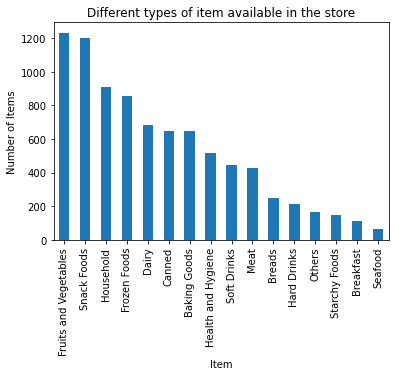

In [21]:
# we will analyze only the training set

train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [22]:
# checking the different types of Outlet Size

train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

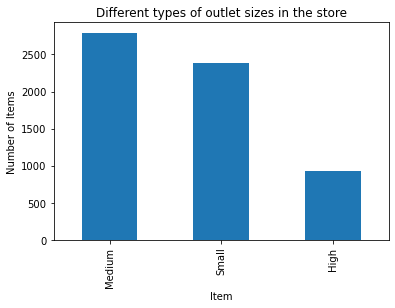

In [23]:
# we will analyze only the training set

train['Outlet_Size'].value_counts(normalize = True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [24]:
# fat content vs outlet identifier

Item_Fat_Content = pd.crosstab(train['Item_Fat_Content'],train['Outlet_Identifier'])
Item_Fat_Content

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Item_Fat_Content,,,,,,,,,,
LF,26,32,31,42,19,37,38,26,39,26
Low Fat,328,556,550,547,314,553,559,570,552,560
Regular,187,313,317,312,177,324,314,309,320,316
low fat,5,18,13,9,13,15,9,13,7,10
reg,9,13,15,18,5,6,10,11,12,18


<AxesSubplot:xlabel='Item_Fat_Content'>

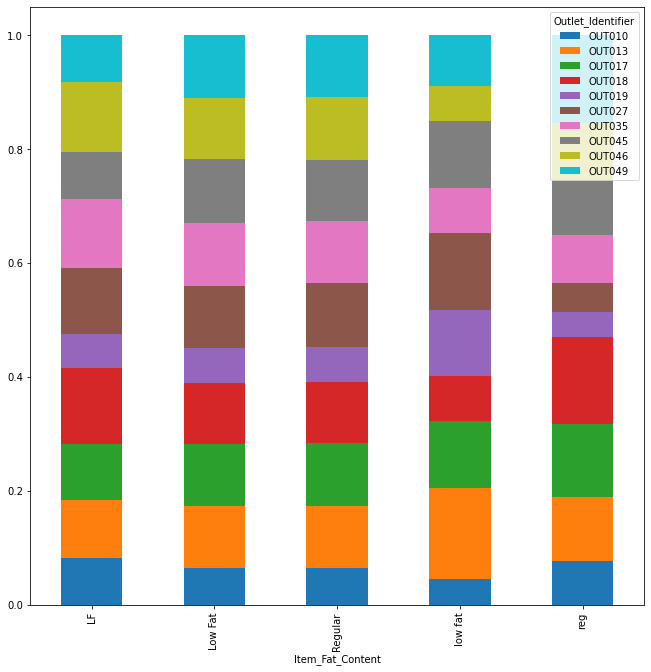

In [28]:
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(11, 11))

<AxesSubplot:xlabel='Item_Type'>

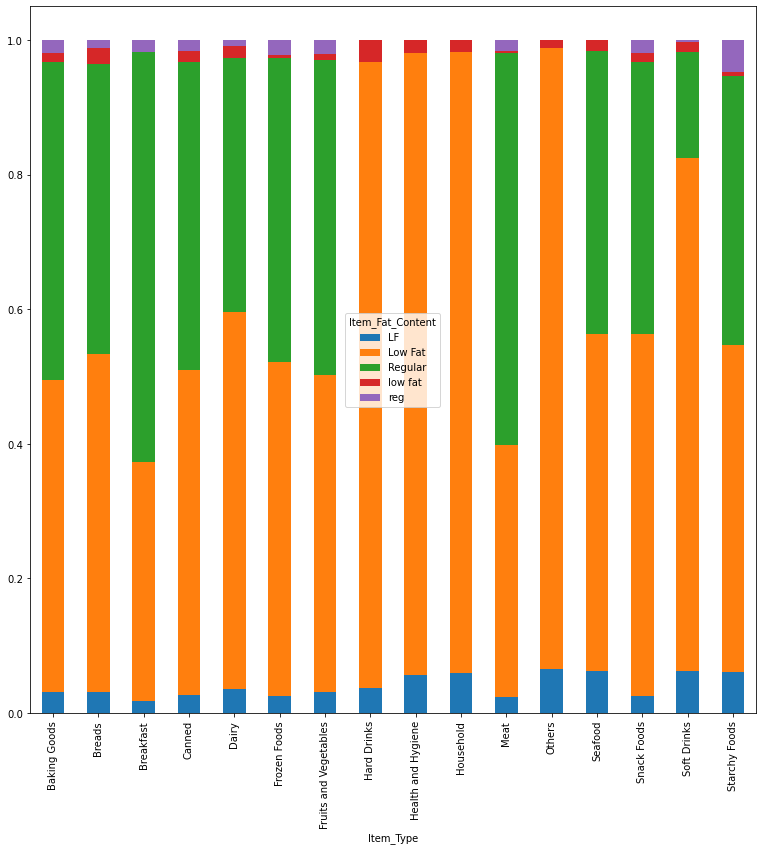

In [27]:
# fat content vs item type

Item_Type = pd.crosstab(train['Item_Type'], train['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(13, 13))

In [31]:
Item_Type

Item_Fat_Content,LF,Low Fat,Regular,low fat,reg
Item_Type,,,,,
Baking Goods,20,301,306,8,13
Breads,8,126,108,6,3
Breakfast,2,39,67,0,2
Canned,17,314,297,10,11
Dairy,24,382,258,12,6
Frozen Foods,22,424,387,4,19
Fruits and Vegetables,39,580,577,11,25
Hard Drinks,8,199,0,7,0
Health and Hygiene,29,481,0,10,0


In [32]:
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0)

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Item_Fat_Content,,,,,,,,,,
LF,0.082278,0.101266,0.098101,0.132911,0.060127,0.117089,0.120253,0.082278,0.123418,0.082278
Low Fat,0.064453,0.109255,0.108076,0.107487,0.061702,0.108666,0.109845,0.112006,0.108469,0.110041
Regular,0.064728,0.108342,0.109727,0.107996,0.061267,0.112150,0.108688,0.106957,0.110765,0.109380
low fat,0.044643,0.160714,0.116071,0.080357,0.116071,0.133929,0.080357,0.116071,0.062500,0.089286
reg,0.076923,0.111111,0.128205,0.153846,0.042735,0.051282,0.085470,0.094017,0.102564,0.153846



## Data preprocessing

In [38]:
# data.apply(lambda x: len(x.unqiue()))
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [97]:
# data.apply(lambda x: len(x.unqiue()))
data.apply(lambda x: x.nunique())

Item_Weight                          416
Item_Visibility                    13006
Item_MRP                            8052
Outlet_Establishment_Year              9
Item_Outlet_Sales                   3493
Outlet_Years                           9
Item_Identifier_Drinks                 2
Item_Identifier_Food                   2
Item_Identifier_Non_Consumable         2
Item_Fat_Content_Low Fat               2
Item_Fat_Content_Regular               2
Item_Type_Baking Goods                 2
Item_Type_Breads                       2
Item_Type_Breakfast                    2
Item_Type_Canned                       2
Item_Type_Dairy                        2
Item_Type_Frozen Foods                 2
Item_Type_Fruits and Vegetables        2
Item_Type_Hard Drinks                  2
Item_Type_Health and Hygiene           2
Item_Type_Household                    2
Item_Type_Meat                         2
Item_Type_Others                       2
Item_Type_Seafood                      2
Item_Type_Snack 

In [39]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [40]:
data['Item_Weight'] = data['Item_Weight'].replace(0, np.NaN)
data['Item_Weight'].fillna( data['Item_Weight'].mean(), inplace = True)
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [44]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)
data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].replace(0, np.NaN)
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mode()[0], inplace = True)

data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [45]:
# replacing values in a column

# combining reg, Regular and Low Fat, low fat and, LF


data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [51]:
data['Item_Identifier'].str[0:2]
data['Item_Identifier'].apply(lambda x : x[0:2])
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [54]:
data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})
data['Item_Identifier'].replace({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

#Map the values to full form
data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

In [55]:
data['Item_Identifier'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

In [56]:
# determining the operation peroid of a time

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].value_counts()

28    2439
26    1553
14    1550
16    1550
9     1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Years, dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
#LE.fit_transform(data)
# above statement wornt work as all the data is directly passed, instead use apply
data.apply(LE.fit_transform)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,1,284,0,1097,4,7567,9,4,1,0,1,2540,4
1,0,57,1,1436,14,632,3,8,1,2,2,422,0
2,1,376,0,1172,10,3897,9,4,1,0,1,1639,4
3,1,393,1,0,6,5626,0,3,1,2,0,670,5
4,2,265,0,0,9,848,1,1,0,2,1,865,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,298,1,718,13,3881,8,2,2,0,1,835,6
5677,1,180,1,11820,15,5069,3,8,1,2,2,835,0
5678,2,293,0,8009,8,3196,7,5,1,1,1,835,3
5679,1,354,1,0,3,6626,2,7,1,1,1,835,1


In [61]:
data.shape

(14204, 13)

In [62]:
# pd.get_dummies(data)
# one hot encoding

data = pd.get_dummies(data)

print(data.shape)

(14204, 47)


In [63]:
#Split into train test
x = data.drop('Item_Outlet_Sales', axis = 1)
y = data['Item_Outlet_Sales']

print(x.shape)
print(y.shape)

(14204, 46)
(14204,)


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state = True)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9942, 46)
(4262, 46)
(9942,)
(4262,)


## Model Building 

In [74]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

LM = LinearRegression()
LM.fit(X_train, y_train)

#predict

y_pred = LM.predict(X_test)
print(y_pred)

mse = mean_squared_error(y_test, y_pred)
print(f" RMSE = {np.sqrt(mse)}")

print('Variance score: %.2f' % r2_score(y_test, y_pred))

[1170. 1331. 2939. ... 2125. 1622.  796.]
 RMSE = 1211.1824223901788
Variance score: 0.27


In [79]:
#Adaboost regressor

from sklearn.ensemble import AdaBoostRegressor

model= AdaBoostRegressor(n_estimators = 100)
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# RMSE
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

print('Variance score: %.2f' % r2_score(y_test, y_pred))

RMSE : 1299.227773456404
Variance score: 0.16


In [81]:
#GBR
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

[1112.28664692 1377.35897419 2383.51173509 ... 2271.76375015 1562.42318963
  588.46512923]
RMSE : 1200.0832252106727
Variance score: 0.29


In [84]:
#Random forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(X_train, y_train)

# predicting the  test set results
y_pred = model.predict(X_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(X_train, y_train))

[1082.431008 1175.20358  2038.486518 ... 2299.966152 1529.935162
  656.67854 ]
RMSE : 1283.223638120829
Variance score: 0.18
Result : 0.890718334285639


In [87]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)
print(y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[1128.531   958.752  5153.292  ... 3151.8972  958.752   958.752 ]
 RMSE :  1722.5795241634344


In [89]:
# SVM
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

# predicting the x test results
y_pred = model.predict(X_test)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

RMSE : 1586.859471019862


In [90]:
# Neural Netowrks

In [92]:
import numpy as np

x_train = np.asmatrix(X_train)
x_test = np.asmatrix(X_test)
y_train = np.asmatrix(y_train.T)
y_test = np.asmatrix(y_test.T)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9942, 46)
(4262, 46)
(1, 9942)
(1, 4262)


In [93]:
!pip install tensorflow

  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=461c9b046b02c5734cfd4604db4f06a1f74fbbe67be5bbc68c0dbe27cc7220bc
  Stored in directory: c:\users\saurabhsingh\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
